# Haser model

Reproduce Fig. 1 of Combi et al. (2004): Column density versus project distance for a family of Haser model profiles of a daughter species.

<IPython.core.display.Javascript object>


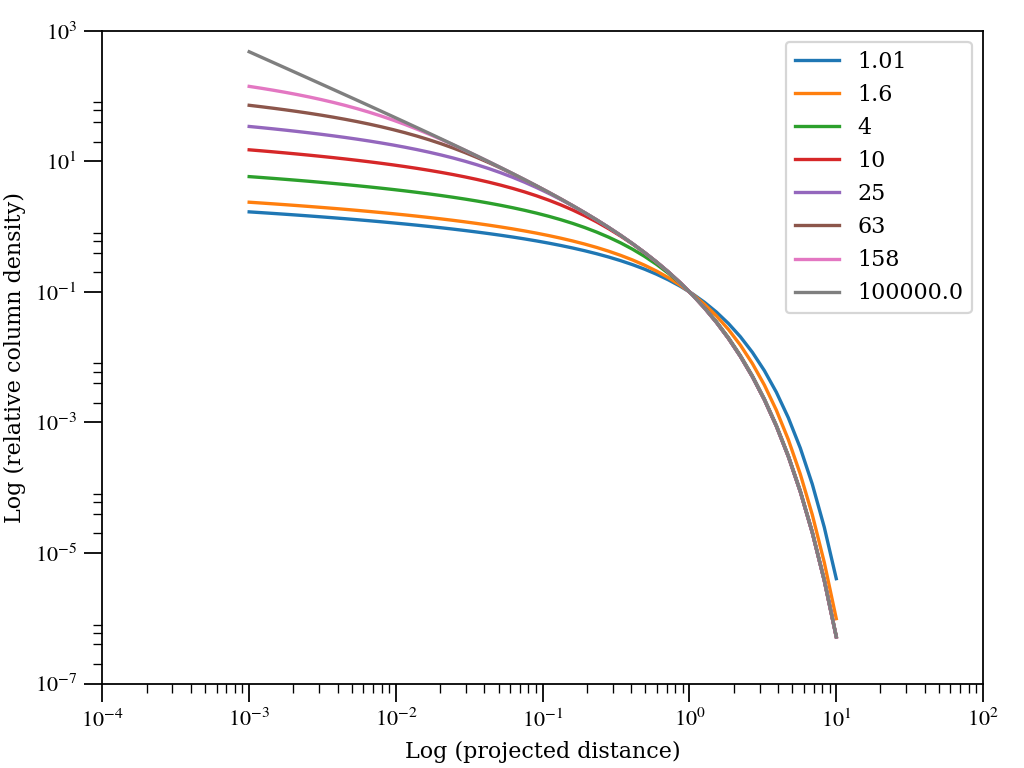

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from sbpy.activity import Haser

% matplotlib notebook

Q = 1e28 / u.s
v = 1 * u.km / u.s
parent = 1e5 * u.km

fig = plt.figure(1)
fig.clear()
ax = fig.add_subplot(111)

rho = np.logspace(-3, 1) * parent
norm = None
for ratio in [1.01, 1.6, 4, 10, 25, 63, 158, 1e5]:
    daughter = parent / ratio
    coma = Haser(Q, v, parent, daughter)
    N = coma.column_density(rho)
    norm = 10 * coma.column_density(parent)
    
    plt.plot(rho / parent, N / norm, label=ratio)
    
plt.setp(ax, xlim=[1e-4, 1e2], xscale='log', xlabel='Log (projected distance)',
         ylim=[1e-7, 1e3], yscale='log', ylabel='Log (relative column density)')
plt.legend()
plt.draw()

Reproduce Newburn and Johnson (1978) CN, C2, and C3 production rates.

In [2]:
eph = {'rh': 1.07 * u.au, 'delta': 0.363 * u.au}
aper = 12.5 * u.arcsec

Nobs = {  # total number observed
    'CN': 6.4e26,
    'C3': 8.3e28,
    'C2': 7.8e27,
}

gamma = {  # length scales: parent, daughter
    'CN': (1.4e4, 1.7e5) * u.km,
    'C3': (1.0,   4.6e4) * u.km,
    'C2': (1.0e4, 7.6e4) * u.km,
}

Q = 1 / u.s
v = 1 * u.km / u.s
Q_v = []

print('Retrieved Q/v:')
for species in Nobs:
    coma = Haser(Q, v, gamma[species][0], gamma[species][1])
    N = coma.total_number(aper, eph)
    Q_v.append(Nobs[species] * Q / v / N)
    print('  {} = {}'.format(species, Q_v[-1]))

Retrieved Q/v:
  CN = 5.810541725244976e+23 1 / km
  C3 = 1.778198017226199e+25 1 / km
  C2 = 5.916363255922225e+24 1 / km


/home/msk/local/lib/python3.6/site-packages/astropy-2.0.2-py3.6-linux-x86_64.egg/astropy/units/quantity.py:1000: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)
